2. Data Analysis and Visualization:

    • Infer key insights from the data.

    • Visualize the data using appropriate plots and charts.

– Data analysis and insights.

– Data visualization using Matplotlib.

    1- Loaded the data to check if there are no null values
    2- Most Common Chemicals
    3- Most Common Chemical in Each Category
    4- Listed Companies With Most Products
    5- Listed Companies With the Broadest Range of Chemicals
    6- Listed Popular (Most Products In Primary Category) Product Primary Category
    7- Listed Popular (Most Products In Sub-Category) Product Sub-Category
    8- Chemical Report by Year


In [10]:
import pandas as pd

# df = pd.read_csv("cscpopendata.csv")
# Characters that are not encoded in UTF-8, Got error, Used encoding
df = pd.read_csv("cleaned_cscpopendata.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   114635 non-null  float64
 3   CSF                     114635 non-null  object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114635 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               114635 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [3]:
# Count the frequency of each chemical and display the top 10
chemical_counts = df['ChemicalName'].value_counts().head(10)
print("Most Common Chemicals:\n", chemical_counts)


Most Common Chemicals:
 ChemicalName
Titanium dioxide                                                                                       93480
Silica, crystalline (airborne particles of respirable size)                                             2817
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2154
Mica                                                                                                    1919
Butylated hydroxyanisole                                                                                1888
Carbon black                                                                                            1758
Talc                                                                                                    1549
Cocamide diethanolamine                                                                                 1397
Retinyl palmitate                                                                          

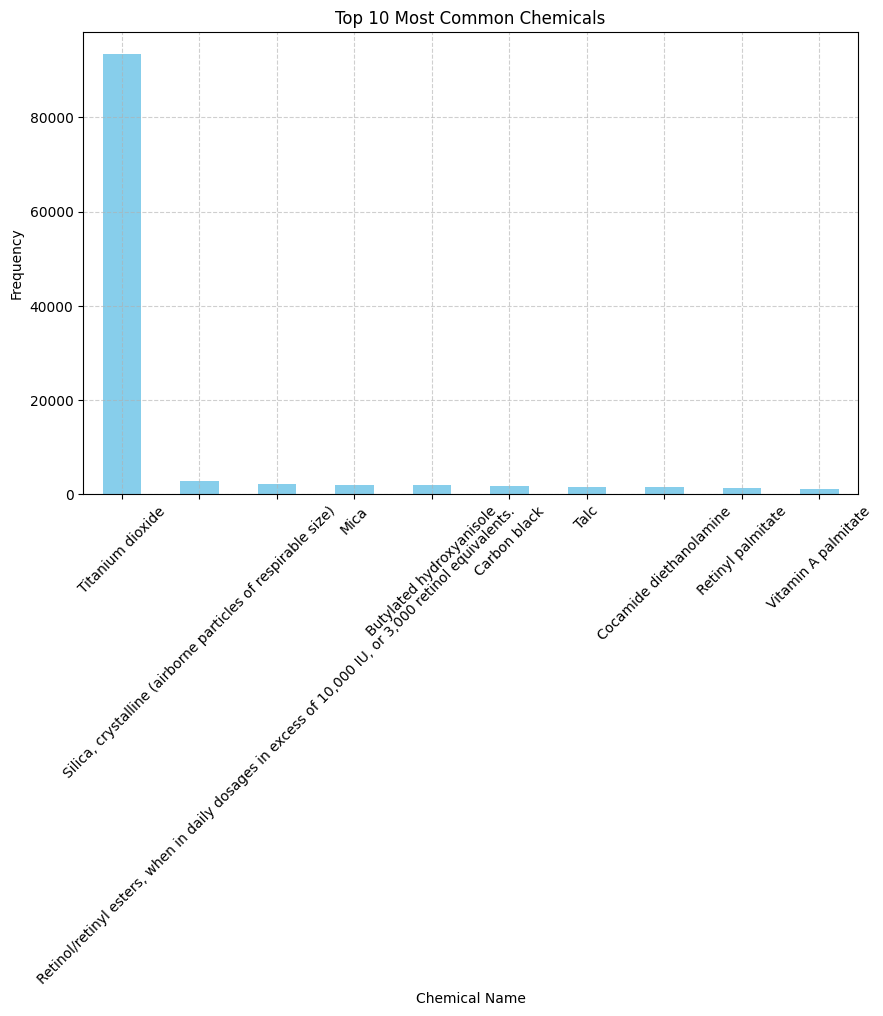

In [4]:
import matplotlib.pyplot as plt

chemical_counts = df['ChemicalName'].value_counts().head(10)

plt.figure(figsize=(10, 6))
chemical_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Chemicals')
plt.xlabel('Chemical Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [10]:
# Group by 'PrimaryCategory' and identify the most common chemical in each category
top_chemicals_per_category = df.groupby('PrimaryCategory')['ChemicalName'].agg(
    lambda x: x.value_counts().index[0]
)
print("Most Common Chemicals by Product Category:\n", top_chemicals_per_category)


Most Common Chemicals by Product Category:
 PrimaryCategory
Baby Products                        Titanium dioxide
Bath Products                        Titanium dioxide
Fragrances                           Titanium dioxide
Hair Care Products (non-coloring)    Titanium dioxide
Hair Coloring Products               Titanium dioxide
Makeup Products (non-permanent)      Titanium dioxide
Nail Products                        Titanium dioxide
Oral Hygiene Products                Titanium dioxide
Personal Care Products               Titanium dioxide
Shaving Products                     Titanium dioxide
Skin Care Products                   Titanium dioxide
Sun-Related Products                 Titanium dioxide
Tattoos and Permanent Makeup         Titanium dioxide
Name: ChemicalName, dtype: object


In [4]:
# Count the number of products per company and display the top 10
company_product_counts = df['CompanyName'].value_counts().head(10)
print("Companies with Most Products:\n", company_product_counts)


Companies with Most Products:
 CompanyName
L'Oreal USA                            5747
S+                                     5165
Coty                                   5162
Revlon Consumer Product Corporation    4341
Bare Escentuals Beauty, Inc.           3828
The Procter & Gamble Company           3535
NYX Los Angeles, Inc.                  3227
Charlotte Tilbury Beauty Ltd           2770
Tarte Cosmetics                        2497
Victoria's Secret Beauty               2219
Name: count, dtype: int64


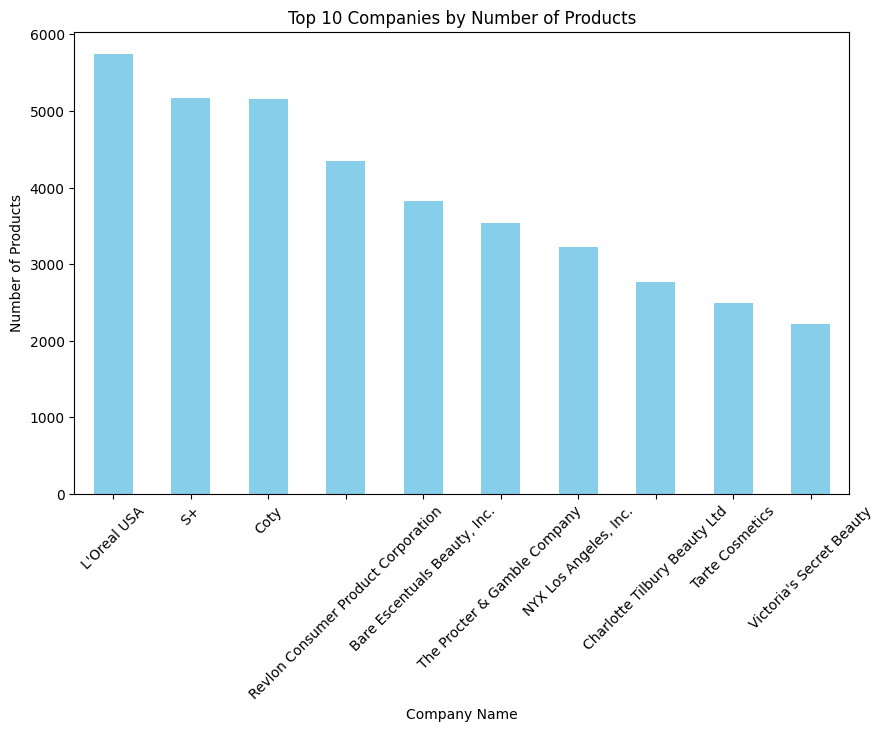

In [12]:
import matplotlib.pyplot as plt

# Count the number of products per company and display the top 10
company_product_counts = df['CompanyName'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
company_product_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies by Number of Products')
plt.xlabel('Company Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


In [11]:
# Group by 'CompanyName' and count unique chemicals used by each company
chemical_diversity = df.groupby('CompanyName')['ChemicalName'].nunique().sort_values(ascending=False).head(10)
print("Companies with the Broadest Range of Chemicals:\n", chemical_diversity)


Companies with the Broadest Range of Chemicals:
 CompanyName
Regis Corporation                    25
Coty                                 18
Fisk Industries Inc                  18
Palladio Beauty Group                15
American International Industries    14
Ventura International, Ltd           13
Rituals Cosmetics USA, Inc.          13
NSE Products, Inc.                   11
Bliss World LLC                      11
Hoyu America Co.                     10
Name: ChemicalName, dtype: int64


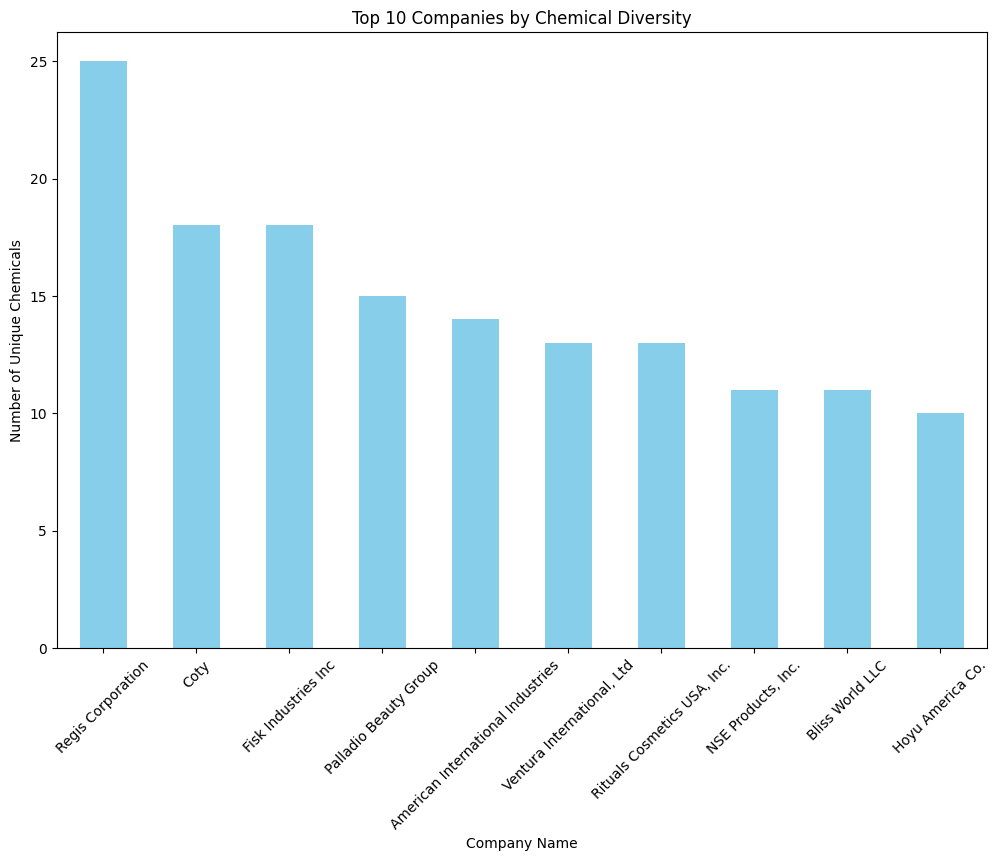

In [14]:
import matplotlib.pyplot as plt


chemical_diversity = df.groupby('CompanyName')['ChemicalName'].nunique().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 8))
chemical_diversity.plot(kind='bar', color='skyblue')  
plt.title('Top 10 Companies by Chemical Diversity')
plt.xlabel('Company Name')
plt.ylabel('Number of Unique Chemicals')
plt.xticks(rotation=45)
plt.show()


In [7]:
# Count the number of occurrences for each primary category 
category_counts = df['PrimaryCategory'].value_counts().head(10)

print("Popular Product Categories:\n", category_counts)



Popular Product Categories:
 PrimaryCategory
Makeup Products (non-permanent)      75827
Nail Products                        15347
Skin Care Products                    7683
Sun-Related Products                  4939
Bath Products                         3466
Hair Coloring Products                2061
Hair Care Products (non-coloring)     1620
Tattoos and Permanent Makeup          1477
Personal Care Products                 765
Fragrances                             654
Name: count, dtype: int64


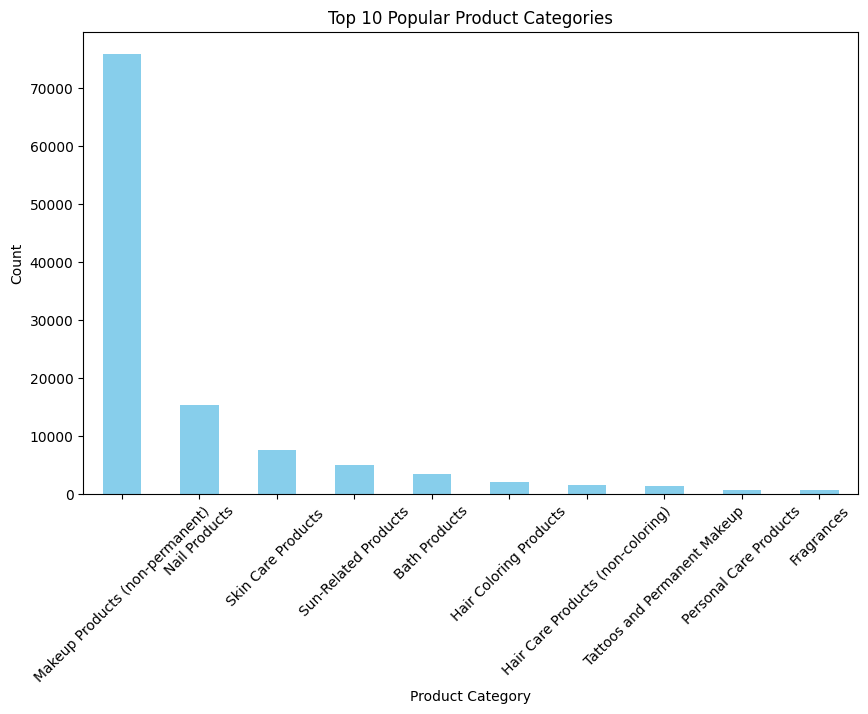

In [16]:
import matplotlib.pyplot as plt


category_counts = df['PrimaryCategory'].value_counts().head(10)


plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')  
plt.title('Top 10 Popular Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Count the number of occurrences for each subcategory

subcategory_counts = df['SubCategory'].value_counts().head(10)
print("Popular Subcategories:\n", subcategory_counts)

Popular Subcategories:
 SubCategory
Lip Color - Lipsticks, Liners, and Pencils     16555
Eye Shadow                                     15744
Foundations and Bases                          14096
Nail Polish and Enamel                          9945
Lip Gloss/Shine                                 8972
Eyeliner/Eyebrow Pencils                        5948
Face Powders                                    4928
Sunscreen (making a cosmetic claim)             4557
Blushes                                         4082
Skin Moisturizers (making a cosmetic claim)     3365
Name: count, dtype: int64


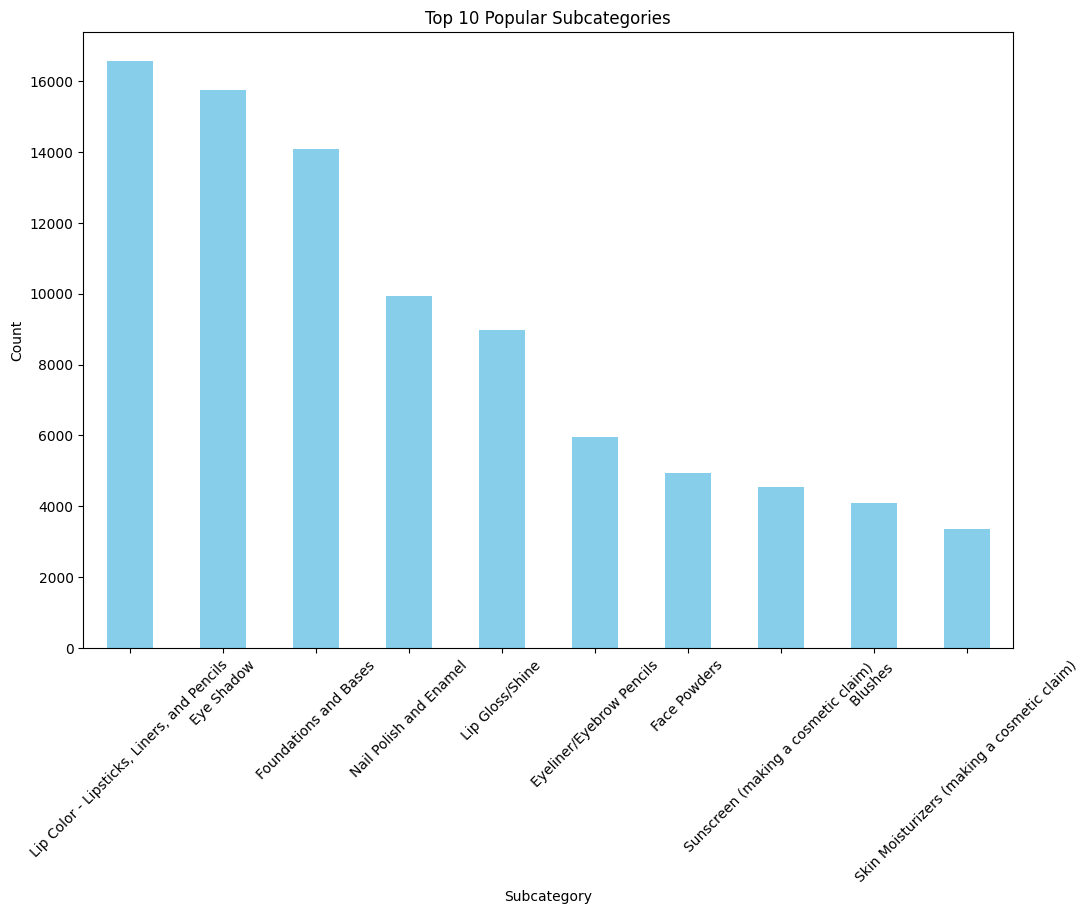

In [18]:
import matplotlib.pyplot as plt


subcategory_counts = df['SubCategory'].value_counts().head(10)


plt.figure(figsize=(12, 8))
subcategory_counts.plot(kind='bar', color='skyblue')  
plt.title('Top 10 Popular Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Reports by Year:
 YearReported
2009    30680
2010    14778
2011     4533
2012     3742
2013     6377
2014     8483
2015     7788
2016     4494
2017     7685
2018     9615
2019    13877
2020     2583
Name: count, dtype: int64


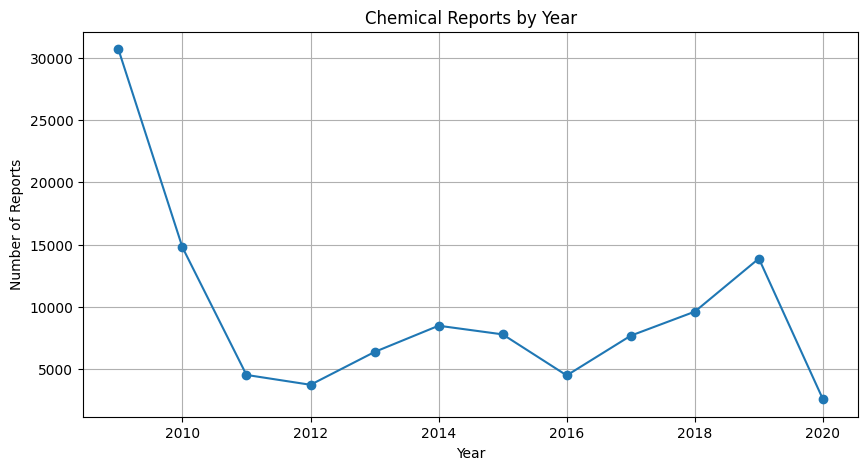

In [9]:
# Convert the 'InitialDateReported' to datetime format and extract the year
df['YearReported'] = pd.to_datetime(df['InitialDateReported']).dt.year

# Count the number of reports each year
yearly_reports = df['YearReported'].value_counts().sort_index()
print("Reports by Year:\n", yearly_reports)

# Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(yearly_reports.index, yearly_reports.values, marker='o')
plt.title('Chemical Reports by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.show()
